<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/3qubit%EC%96%91%EC%9E%90%EB%82%9C%EC%88%98%EB%B0%9C%EC%83%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!python3 -m pip install qiskit[visualization]
!python3 -m pip install qiskit-ionq
!python3 -m pip install qiskit-ibmq-provider
!python3 -m pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.5 MB/s eta 0:00:00


3Qubit으로 양자 난수 발생

In [40]:
# Qiskit 모듈 불러오기
from qiskit import QuantumCircuit, Aer, execute, IBMQ, transpile, assemble
from qiskit_ionq import IonQProvider
from qiskit.providers.jobstatus import JobStatus
import time

In [41]:

# 3 큐비트 양자 회로 생성
qc = QuantumCircuit(3, 3)

# 큐비트 0, 1 및 2를 슈미트 (Hadamard) 게이트로 초기화
qc.h(qubit=0)
qc.h(qubit=1)
qc.h(qubit=2)

# 결과 측정
qc.measure([0,1,2], [0,1,2])

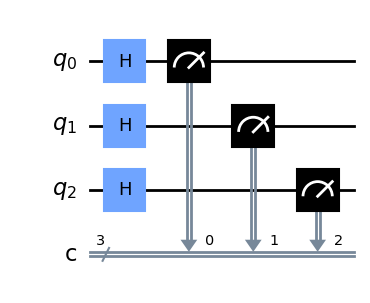

In [42]:
# 양자회로 구조 보기
qc.draw('mpl')

In [43]:
# IonQ Cloud 서비스 사용하기 위한 준비
ionq_provider = IonQProvider("여기에 IonQ Cloud에서 Access Key를 복사해 넣으세요.") #IonQ Cloud에서 Access Key를 복사해 넣어야 합니다.
# Show all backends:
print(ionq_provider.backends())

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


In [44]:
# IBMQ Cloud 서비스 사용하기 위한 준비

# IBM Quantum Provider에 등록된 계정 정보를 입력합니다.
IBMQ.save_account('여기에 IBMQ Cloud에서 Access Key를 복사해 넣으세요.', overwrite=True)
# IBM Quantum Provider로 접속합니다.
IBMQ.load_account()

ibmq_provider = IBMQ.get_provider('ibm-q', 'open', 'main')
backends = ibmq_provider.backends()

# 백엔드 리스트 출력
print("Available backends:")
for backend in backends:
  print(backend.name())
###for

ibmqfactory.load_account:WARNING:2023-08-02 02:40:53,955: Credentials are already in use. The existing account in the session will be replaced.


Available backends:
ibmq_qasm_simulator
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_jakarta
ibmq_manila
ibm_lagos
ibm_nairobi
ibm_perth


In [51]:
#backend = ionq_provider.get_backend('ionq_simulator')
#backend = ionq_provider.get_backend('ionq_qpu')
backend = ibmq_provider.get_backend('ibmq_qasm_simulator')
#backend = ibmq_provider.get_backend('ibmq_quito')
#backend = Aer.get_backend('qasm_simulator')  #Local Qiskit Aer 시뮬레이터 사용

job = execute(qc, backend, shots=1024)

# Check if job is done
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(2)
###while

# grab a coffee! This can take up to a few minutes.
# once we break out of that while loop, we know our job is finished
print("Job status is", job.status() )

# 결과 출력
result = job.result()
counts = result.get_counts()
print(counts)

Job status is JobStatus.DONE
{'101': 112, '010': 147, '111': 122, '000': 137, '011': 125, '110': 129, '100': 120, '001': 132}


각 확률을 1024샷에 3Qubit 으로 나누고,<BR>
각각의 확률값을 2진 비트로 전환

In [46]:
bits = " "
for v in counts.values():
    if v > 1024/(2**3):
        bits += '1'
    else:
        bits += '0'
    ###if
###
print(bits)

 00100110


In [47]:
#매번 전체를 수행할 때마다 결과가 다르게 나와야 합니다.
decimal_string = str(int(bits, 2))
print(decimal_string)

38


야호: 양자회로를 이용한 Hello Quantum Program 완성<BR>
by 박문기